In [1]:
pip install cfbd --upgrade

Note: you may need to restart the kernel to use updated packages.


In [2]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cfbd
import re
from datetime import datetime

In [3]:
with open('keys/keys.json') as fi:
    credentials = json.load(fi)

In [4]:
api_key = credentials['api_key']

In [5]:
configuration = cfbd.Configuration()
configuration.api_key['Authorization'] = api_key
configuration.api_key_prefix['Authorization'] = 'Bearer'

api_config = cfbd.ApiClient(configuration)

In [6]:
lines = pd.concat( 
    map(pd.read_csv, ['lines_data\lines_2018.csv', 'lines_data\lines_2019.csv', 'lines_data\lines_2020.csv', 'lines_data\lines_2021.csv', 'lines_data\lines_2022.csv']), ignore_index=True)

In [7]:
lines = lines.drop('Unnamed: 0', axis=1)

In [8]:
pd.set_option('display.max_columns', None)

In [9]:
fbs = ['FBS Independents', 'Conference USA', 'Mountain West','American Athletic', 'Mid-American', 'SEC', 'Pac-12', 'Big Ten',
       'ACC', 'Big 12', 'Sun Belt']

In [10]:
fcs = ['AWC', 'Atlantic Sun', 'Southern',
       'SWAC', 'MVFC', 'OVC', 'Big South', 'CAA', 'NEC',
       'Western Athletic', 'Big Sky', 'MEAC', 'Southland', 'Patriot',
       'Ivy', 'Pioneer']

In [11]:
p5 = ['SEC', 'Pac-12', 'Big Ten', 'ACC', 'Big 12']

In [12]:
g5 = ['Conference USA', 'Mountain West','American Athletic', 'Mid-American', 'Sun Belt']

In [13]:
lines

,id,season,week,season_type,date,home_team,home_conference,home_score,away_team,away_conference,away_score,formatted_spread,home_spread,home_result,home_diff,away_spread,away_result,away_diff,covering_team,vegas_error
0,401013357,2018,1,regular,2018-08-25,UMass,FBS Independents,63.0,Duquesne,NEC,15.0,UMass -21,-21.0,-48.0,27.0,21.0,48.0,-27.0,UMass,27.0
1,401014972,2018,1,regular,2018-08-25,Rice,Conference USA,31.0,Prairie View,SWAC,28.0,Rice -22.5,-22.5,-3.0,-19.5,22.5,3.0,19.5,Prairie View,19.5
2,401022510,2018,1,regular,2018-08-25,Colorado State,Mountain West,34.0,Hawai'i,Mountain West,43.0,Colorado State -17,-17.0,9.0,-26.0,17.0,-9.0,26.0,Hawai'i,26.0
3,401019470,2018,1,regular,2018-08-30,Connecticut,American Athletic,17.0,UCF,American Athletic,56.0,UCF -22.5,22.5,39.0,-16.5,-22.5,-39.0,16.5,UCF,16.5
4,401020671,2018,1,regular,2018-08-30,Ball State,Mid-American,42.0,Central Connecticut,NEC,6.0,Ball State -19.5,-19.5,-36.0,16.5,19.5,36.0,-16.5,Ball State,16.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4179,401437037,2022,14,regular,2022-12-03,Troy,Sun Belt,45.0,Coastal Carolina,Sun Belt,26.0,Troy -6.5,-6.5,-19.0,12.5,6.5,19.0,-12.5,Troy,12.5
4180,401437132,2022,14,regular,2022-12-03,Jackson State,SWAC,43.0,Southern,SWAC,24.0,Jackson State -20.5,-20.5,-19.0,-1.5,20.5,19.0,1.5,Southern,1.5
4181,401437009,2022,14,regular,2022-12-04,North Carolina,ACC,10.0,Clemson,ACC,39.0,Clemson -7.5,7.5,29.0,-21.5,-7.5,-29.0,21.5,Clemson,21.5
4182,401437031,2022,14,regular,2022-12-04,Michigan,Big Ten,43.0,Purdue,Big Ten,22.0,Michigan -16,-16.0,-21.0,5.0,16.0,21.0,-5.0,Michigan,5.0


In [47]:
teams = []
for x in lines.iterrows():
    if x[1]['home_diff'] < 0:
        teams.append(x[1]['home_team'])
    else:
        teams.append(x[1]['away_team'])

In [48]:
lines['non_covering_team'] = teams

In [49]:
# shift column 'Name' to first position 
twelve_column = lines.pop('non_covering_team') 
  
# insert column using insert(position,column_name, 
# first_column) function 
lines.insert(19, 'non_covering_team', twelve_column) 

In [14]:
game_winner = []
for x in lines.iterrows():
    if x[1]['home_score'] > x[1]['away_score']:
        game_winner.append(x[1]['home_team'])
    else:
        game_winner.append(x[1]['away_team'])

In [15]:
lines['game_winner'] = game_winner

In [16]:
favorite = []
for x in lines.iterrows():
    if x[1]['away_spread'] > x[1]['home_spread']:
        favorite.append(x[1]['home_team'])
    else:
        favorite.append(x[1]['away_team'])

In [17]:
lines['favorite'] = favorite

In [18]:
underdog = []
for x in lines.iterrows():
    if x[1]['away_spread'] < x[1]['home_spread']:
        underdog.append(x[1]['home_team'])
    else:
        underdog.append(x[1]['away_team'])

In [19]:
lines['underdog'] = underdog

In [20]:
accuracy = []
for x in lines.iterrows():
    if (x[1]['vegas_error'] >7) and (x[1]['favorite'] == x[1]['covering_team']):
        accuracy.append('Fav Cover by +7')
    elif (x[1]['vegas_error'] >7) and (x[1]['underdog'] == x[1]['covering_team']):
        accuracy.append('Dog Cover by +7')
    else:
        accuracy.append('Vegas Within 7')

In [21]:
lines['within_td'] = accuracy

In [22]:
#how 
accuracy_pie = lines['within_td'].value_counts(normalize=True)
accuracy_pie

Vegas Within 7     0.364006
Dog Cover by +7    0.326721
Fav Cover by +7    0.309273
Name: within_td, dtype: float64

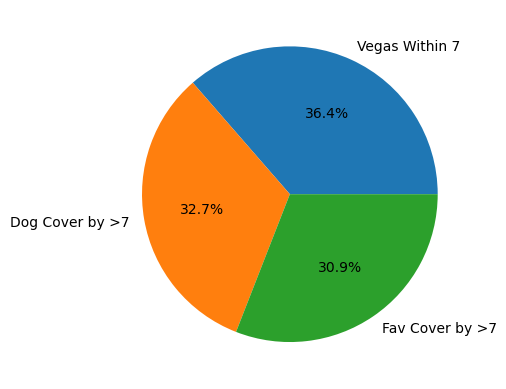

In [23]:
names = ['Vegas Within 7','Dog Cover by >7', 'Fav Cover by >7']
plt.pie(accuracy_pie, labels=names, autopct='%1.1f%%')
plt.show()

In [24]:
lines['vegas_error'].value_counts(normalize=True)

1.5     0.033716
0.5     0.030846
9.5     0.030368
4.5     0.029173
6.5     0.028455
          ...   
53.0    0.000239
52.5    0.000239
46.0    0.000239
50.0    0.000239
59.0    0.000239
Name: vegas_error, Length: 103, dtype: float64

In [50]:
lines

,id,season,week,season_type,date,home_team,home_conference,home_score,away_team,away_conference,away_score,formatted_spread,home_spread,home_result,home_diff,away_spread,away_result,away_diff,covering_team,non_covering_team,vegas_error,game_winner,favorite,underdog,within_td,correct_predict
0,401013357,2018,1,regular,2018-08-25,UMass,FBS Independents,63.0,Duquesne,NEC,15.0,UMass -21,-21.0,-48.0,27.0,21.0,48.0,-27.0,UMass,Duquesne,27.0,UMass,UMass,Duquesne,Fav Cover by +7,Yes
1,401014972,2018,1,regular,2018-08-25,Rice,Conference USA,31.0,Prairie View,SWAC,28.0,Rice -22.5,-22.5,-3.0,-19.5,22.5,3.0,19.5,Prairie View,Rice,19.5,Rice,Rice,Prairie View,Dog Cover by +7,Yes
2,401022510,2018,1,regular,2018-08-25,Colorado State,Mountain West,34.0,Hawai'i,Mountain West,43.0,Colorado State -17,-17.0,9.0,-26.0,17.0,-9.0,26.0,Hawai'i,Colorado State,26.0,Hawai'i,Colorado State,Hawai'i,Dog Cover by +7,No
3,401019470,2018,1,regular,2018-08-30,Connecticut,American Athletic,17.0,UCF,American Athletic,56.0,UCF -22.5,22.5,39.0,-16.5,-22.5,-39.0,16.5,UCF,Connecticut,16.5,UCF,UCF,Connecticut,Fav Cover by +7,Yes
4,401020671,2018,1,regular,2018-08-30,Ball State,Mid-American,42.0,Central Connecticut,NEC,6.0,Ball State -19.5,-19.5,-36.0,16.5,19.5,36.0,-16.5,Ball State,Central Connecticut,16.5,Ball State,Ball State,Central Connecticut,Fav Cover by +7,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4179,401437037,2022,14,regular,2022-12-03,Troy,Sun Belt,45.0,Coastal Carolina,Sun Belt,26.0,Troy -6.5,-6.5,-19.0,12.5,6.5,19.0,-12.5,Troy,Coastal Carolina,12.5,Troy,Troy,Coastal Carolina,Fav Cover by +7,Yes
4180,401437132,2022,14,regular,2022-12-03,Jackson State,SWAC,43.0,Southern,SWAC,24.0,Jackson State -20.5,-20.5,-19.0,-1.5,20.5,19.0,1.5,Southern,Jackson State,1.5,Jackson State,Jackson State,Southern,Vegas Within 7,Yes
4181,401437009,2022,14,regular,2022-12-04,North Carolina,ACC,10.0,Clemson,ACC,39.0,Clemson -7.5,7.5,29.0,-21.5,-7.5,-29.0,21.5,Clemson,North Carolina,21.5,Clemson,Clemson,North Carolina,Fav Cover by +7,Yes
4182,401437031,2022,14,regular,2022-12-04,Michigan,Big Ten,43.0,Purdue,Big Ten,22.0,Michigan -16,-16.0,-21.0,5.0,16.0,21.0,-5.0,Michigan,Purdue,5.0,Michigan,Michigan,Purdue,Vegas Within 7,Yes


In [26]:
prediction = []
for x in lines.iterrows():
    if x[1]['game_winner'] == x[1]['favorite']:
        prediction.append('Yes')
    else:
        prediction.append('No')

In [27]:
lines['correct_predict'] = prediction

In [28]:
lines['correct_predict'].value_counts(normalize=True)

Yes    0.761711
No     0.238289
Name: correct_predict, dtype: float64

In [29]:
# & of the time a home favorite covers the spread
(len(lines[(lines['home_team'] == lines['favorite'])&(lines['home_team'] == lines['covering_team'])])) / len(lines)*100

30.927342256214146

In [30]:
fav_20_pts = lines[(lines['home_spread']<=-20)|(lines['away_spread']<=-20)]

In [31]:
fav_20_cover = []
for x in fav_20_pts.iterrows():
    if x[1]['favorite'] == x[1]['covering_team']:
        fav_20_cover.append('Yes')
    else:
        fav_20_cover.append('No')

In [32]:
(fav_20_cover.count('Yes'))/len(fav_20_cover)

0.4966313763233879

In [33]:
fav_20_cover.count('Yes')

516

In [34]:
fav_20_cover.count('No')

523

In [35]:
lines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4184 entries, 0 to 4183
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                4184 non-null   int64  
 1   season            4184 non-null   int64  
 2   week              4184 non-null   int64  
 3   season_type       4184 non-null   object 
 4   date              4184 non-null   object 
 5   home_team         4184 non-null   object 
 6   home_conference   4184 non-null   object 
 7   home_score        4184 non-null   float64
 8   away_team         4184 non-null   object 
 9   away_conference   4184 non-null   object 
 10  away_score        4184 non-null   float64
 11  formatted_spread  4184 non-null   object 
 12  home_spread       4182 non-null   float64
 13  home_result       4184 non-null   float64
 14  home_diff         4182 non-null   float64
 15  away_spread       4182 non-null   float64
 16  away_result       4184 non-null   float64


In [37]:
lines[(lines['home_conference'].isin(fbs))&(lines['away_conference'].isin(fbs))]

,id,season,week,season_type,date,home_team,home_conference,home_score,away_team,away_conference,away_score,formatted_spread,home_spread,home_result,home_diff,away_spread,away_result,away_diff,covering_team,vegas_error,game_winner,favorite,underdog,within_td,correct_predict
2,401022510,2018,1,regular,2018-08-25,Colorado State,Mountain West,34.0,Hawai'i,Mountain West,43.0,Colorado State -17,-17.0,9.0,-26.0,17.0,-9.0,26.0,Hawai'i,26.0,Hawai'i,Colorado State,Hawai'i,Dog Cover by +7,No
3,401019470,2018,1,regular,2018-08-30,Connecticut,American Athletic,17.0,UCF,American Athletic,56.0,UCF -22.5,22.5,39.0,-16.5,-22.5,-39.0,16.5,UCF,16.5,UCF,UCF,Connecticut,Fav Cover by +7,Yes
7,401012880,2018,1,regular,2018-08-31,Michigan State,Big Ten,38.0,Utah State,Mountain West,31.0,Michigan State -23.5,-23.5,-7.0,-16.5,23.5,7.0,16.5,Utah State,16.5,Michigan State,Michigan State,Utah State,Dog Cover by +7,Yes
8,401013086,2018,1,regular,2018-08-31,Tulane,American Athletic,17.0,Wake Forest,ACC,23.0,Wake Forest -7.5,7.5,6.0,1.5,-7.5,-6.0,-1.5,Tulane,1.5,Wake Forest,Wake Forest,Tulane,Vegas Within 7,Yes
9,401013089,2018,1,regular,2018-08-31,Duke,ACC,34.0,Army,FBS Independents,14.0,Duke -14,-14.0,-20.0,6.0,14.0,20.0,-6.0,Duke,6.0,Duke,Duke,Army,Vegas Within 7,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4178,401437036,2022,14,regular,2022-12-03,Georgia,SEC,50.0,LSU,SEC,30.0,Georgia -17.5,-17.5,-20.0,2.5,17.5,20.0,-2.5,Georgia,2.5,Georgia,Georgia,LSU,Vegas Within 7,Yes
4179,401437037,2022,14,regular,2022-12-03,Troy,Sun Belt,45.0,Coastal Carolina,Sun Belt,26.0,Troy -6.5,-6.5,-19.0,12.5,6.5,19.0,-12.5,Troy,12.5,Troy,Troy,Coastal Carolina,Fav Cover by +7,Yes
4181,401437009,2022,14,regular,2022-12-04,North Carolina,ACC,10.0,Clemson,ACC,39.0,Clemson -7.5,7.5,29.0,-21.5,-7.5,-29.0,21.5,Clemson,21.5,Clemson,Clemson,North Carolina,Fav Cover by +7,Yes
4182,401437031,2022,14,regular,2022-12-04,Michigan,Big Ten,43.0,Purdue,Big Ten,22.0,Michigan -16,-16.0,-21.0,5.0,16.0,21.0,-5.0,Michigan,5.0,Michigan,Michigan,Purdue,Vegas Within 7,Yes
